## **Problem Statement: Automated Classification of Date Fruit Varieties**

### **Background**
Date fruits, grown globally, have various genetic varieties distinguished by their external appearance, including features like color, length, diameter, and shape. Traditionally, identifying these varieties requires expert knowledge, which is both time-consuming and labor-intensive. Automating this process using machine learning can significantly enhance efficiency and accuracy.

### **Objective**
The aim of this study is to develop an automated system for classifying different varieties of date fruits using image analysis and machine learning techniques. Specifically, the varieties to be classified include Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi, and Sagai.

### **Dataset Description**
The dataset consists of 898 images of seven different date fruit varieties, captured using a computer vision system (CVS). From these images, 34 features were extracted, encompassing morphological characteristics, shape, and color.

### **Impact**
Developing an automated classification system for date fruit varieties will streamline the identification process, reduce the need for expert intervention, and ensure consistent and accurate classification. This can significantly benefit agricultural practices, quality control, and market segmentation for date fruits.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path = '/content/drive/My Drive/Colab Notebooks/Date_Fruit_Datasets.xlsx'

In [7]:
# Load the dataset
data = pd.read_excel(file_path)


In [8]:
data.head()


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [10]:
# Separate features and target
X = data.drop(['Class'], axis=1)
Y = data['Class']


In [11]:
X.head()


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,0.6019,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,0.4134,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,0.9183,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,1.8028,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,0.8865,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666


In [12]:
Y.head()

0    BERHI
1    BERHI
2    BERHI
3    BERHI
4    BERHI
Name: Class, dtype: object

In [13]:
Y.tail()

893    SOGAY
894    SOGAY
895    SOGAY
896    SOGAY
897    SOGAY
Name: Class, dtype: object

In [14]:
# Checks the values counts of the class column
Y.value_counts()

Class
DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: count, dtype: int64

In [15]:
# Encoding categorical variable
le = LabelEncoder()
Y = le.fit_transform(Y)

In [29]:
#Check the corresponding count to the encoded categorical
Y= pd.Series(Y)
Y.value_counts()

2    204
5    199
4    166
1     98
6     94
3     72
0     65
Name: count, dtype: int64

In [41]:
n_data ={
    'Y': ['DOKOL', 'SAFAVI','ROTANA', 'DEGLET', 'SOGAY', 'IRAQI', 'BERHI'],
    'label': [204, 199, 166, 98, 94, 72, 65]
}

n_data = pd.DataFrame(n_data)

#Define the mapping from target names to integers
target_mapping = {
   'DOKOL': 0,
   'SAFAVI': 1,
   'ROTANA': 2,
   'DEGLET': 3,
   'SOGAY': 4,
   'IRAQI': 5,
   'BERHI': 6
}

#Apply the mapping to the target column
n_data['Y'] = n_data['Y'].map(target_mapping)
print(n_data)

   Y  label
0  0    204
1  1    199
2  2    166
3  3     98
4  4     94
5  5     72
6  6     65


In [42]:
n_data = n_data.set_index('Y')
n_data

,label
Y,
0,204
1,199
2,166
3,98
4,94
5,72
6,65


In [43]:

#Preprocessing data
S_scaler = StandardScaler()
X = S_scaler.fit_transform(X)

In [44]:
#Splitting data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [45]:
#build the neural network model
mlp = MLPClassifier(max_iter=100, random_state=42)
param_distribution ={
    'hidden_layer_sizes': [(50,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

random_search = RandomizedSearchCV(estimator=mlp, param_distributions=param_distribution, n_iter=10, cv=3, scoring='accuracy',random_state=42)
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=MLPClassifier(max_iter=100, random_state=42),
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(50, 50),
                                                               (100,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam']},
                   random_state=42, scoring='accuracy')

In [46]:
#Build the neural network model
best_mlp = random_search.best_estimator_
y_pred = best_mlp.predict(X_test)

In [47]:
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9555555555555556


In [48]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[11  0  0  1  0  0  0]
 [ 0 16  2  0  0  0  2]
 [ 0  1 49  0  0  0  0]
 [ 0  0  0 10  0  0  0]
 [ 0  0  0  0 35  0  0]
 [ 0  0  0  0  0 33  0]
 [ 0  2  0  0  0  0 18]]


Text(0.5, 1.0, 'Confusion Matrix')

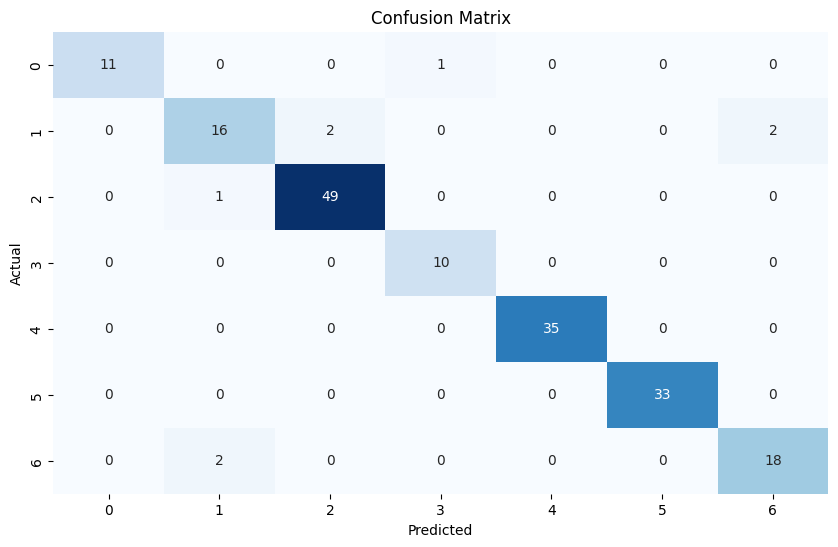

In [22]:
#Visualize the data
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [49]:
print(random_search.best_params_)

{'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50), 'alpha': 0.05, 'activation': 'tanh'}


In [50]:
best_mlp = MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(50,50), learning_rate='constant', random_state=42, solver='adam',warm_start=True, max_iter=1)
max_epochs = 100
train_accuracy = []
test_accuracy = []
for epoch in range(max_epochs):
  best_mlp.fit(X_train, Y_train)
  train_accuracy.append(accuracy_score(Y_train, best_mlp.predict(X_train)))
  test_accuracy.append(accuracy_score(Y_test,  best_mlp.predict(X_test)))

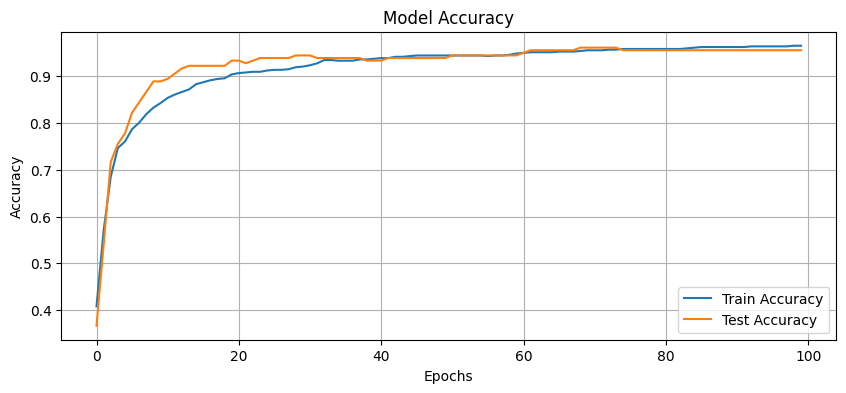

In [51]:
#Visualize the model accuracy
plt.figure(figsize=(10,4))
plt.plot(range(max_epochs),train_accuracy,label='Train Accuracy')
plt.plot(range(max_epochs),test_accuracy,label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model Accuracy")
plt.legend()
plt.grid(True)
plt.show()